In [148]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

In [149]:
#Create function to apply negative to charges
def negative(num):
        return -num

In [150]:
#Import CSV files, creates an Owner label for each one
brenn = pd.read_csv('./wf_brenn.csv', decimal = ",", header = None)
brenn['Owner'] = 'Brenn'
chris = pd.read_csv('./wf_chris.csv', decimal = ",", header = None)
chris['Owner'] = 'Chris'

In [151]:
# Combine dataframes into one 
frames = [chris, brenn]
combined = pd.concat(frames)
df = combined.reset_index().drop('index',axis=1)
#Rename columns
df.columns = ['Date', 'Charge', '*', 'CheckNo', 'Description', 'Owner']
df

,Date,Charge,*,CheckNo,Description,Owner
0,09/12/2018,-145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
1,09/12/2018,-500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2,09/12/2018,-26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
3,09/12/2018,-9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
4,09/12/2018,-7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris
5,09/12/2018,165.00,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX0655 Christ...,Chris
6,09/11/2018,-202.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 DDYAX13XEF1...,Chris
7,09/11/2018,-200.00,*,NaN,ONLINE TRANSFER TO GLYNN C EVERYDAY CHECKING X...,Chris
8,09/10/2018,-6.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris
9,09/10/2018,-11.18,*,NaN,PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...,Chris


In [152]:
df['Charge'].sum()

650.5100000000007

In [153]:
# Apply negatives to all charges
df['Charge'] = df['Charge'].apply(negative)

In [154]:
df.head(50)

,Date,Charge,*,CheckNo,Description,Owner
0,09/12/2018,145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
1,09/12/2018,500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2,09/12/2018,26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
3,09/12/2018,9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
4,09/12/2018,7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris
5,09/12/2018,-165.00,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX0655 Christ...,Chris
6,09/11/2018,202.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 DDYAX13XEF1...,Chris
7,09/11/2018,200.00,*,NaN,ONLINE TRANSFER TO GLYNN C EVERYDAY CHECKING X...,Chris
8,09/10/2018,6.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris
9,09/10/2018,11.18,*,NaN,PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...,Chris


In [155]:
df.dtypes

Date            object
Charge         float64
*               object
CheckNo        float64
Description     object
Owner           object
dtype: object

In [156]:
#Convert Date column to a DateTime object
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")

In [157]:
df.set_index('Date', inplace = True)
df.index.dtype

dtype('<M8[ns]')

In [158]:
df.head()

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-12,145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
2018-09-12,500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2018-09-12,26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
2018-09-12,9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
2018-09-12,7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris


In [159]:
df.tail(5)

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2017-03-27,-450.00,*,NaN,ONLINE TRANSFER FROM GLYNN C EVERYDAY CHECKING...,Brenn
2017-03-22,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn
2017-03-21,20.32,*,NaN,PURCHASE AUTHORIZED ON 03/20 UBER US MAR20 NN ...,Brenn
2017-03-21,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn
2017-03-21,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn


In [160]:
#DONE WITH DATA CLEANING

In [161]:
#DATA PARTITIONING

In [162]:
recurring = df[df['Description'].str.contains('RECURRING', case=False)]['2018']
#EQUINOX IS STILL ON?

In [163]:
df[ df['Description'].str.contains('ASPHALT', case=False) ]['2018']


,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-06,230.0,*,NaN,PURCHASE AUTHORIZED ON 09/04 ASPHALT GREEN BAT...,Brenn
2018-08-02,230.0,*,NaN,PURCHASE AUTHORIZED ON 08/01 ASPHALT GREEN BAT...,Brenn
2018-05-21,230.0,*,NaN,PURCHASE AUTHORIZED ON 05/18 ASPHALT GREEN BAT...,Brenn


In [164]:
uber = df[df['Description'].str.contains('UBER TRIP')]
uber[ uber['Owner'] == 'Brenn' ]['2018'].sum()

Charge                                                    547.84
*                    *******************************************
CheckNo                                                        0
Description    PURCHASE AUTHORIZED ON 06/23 UBER TRIP ASXCJ H...
Owner          BrennBrennBrennBrennBrennBrennBrennBrennBrennB...
dtype: object

In [165]:
uber[ uber['Owner'] == 'Chris' ]['2018'].sum()

Charge                                                   1579.13
*              **********************************************...
CheckNo                                                        0
Description    PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...
Owner          ChrisChrisChrisChrisChrisChrisChrisChrisChrisC...
dtype: object

In [166]:
internet = df[df['Description'].str.contains('OPTIMUM', case=False)]
internet

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-22,129.68,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/21 OPTIMUM ...,Chris
2018-08-21,-65.00,*,NaN,ONLINE TRANSFER FROM GLYNN C REF #IB04ZTFS4R E...,Chris
2018-07-23,129.49,*,NaN,RECURRING PAYMENT AUTHORIZED ON 07/21 OPTIMUM ...,Chris
2018-06-22,145.00,*,NaN,RECURRING PAYMENT AUTHORIZED ON 06/21 OPTIMUM ...,Chris
2018-05-30,10.00,*,NaN,PURCHASE AUTHORIZED ON 05/29 OPTIMUM 7836 203-...,Chris
2018-05-30,274.19,*,NaN,PURCHASE AUTHORIZED ON 05/29 OPTIMUM 7836 203-...,Chris
2018-03-12,255.12,*,NaN,PURCHASE AUTHORIZED ON 03/10 OPTIMUM 7836V 718...,Chris
2017-11-06,182.70,*,NaN,PURCHASE AUTHORIZED ON 11/04 OPTIMUM 7836V 718...,Chris
2017-08-21,10.00,*,NaN,PURCHASE AUTHORIZED ON 08/19 OPTIMUM 7836 203-...,Chris


In [167]:
venmo = df[df['Description'].str.contains('VENMO', case=False)]
venmo.sample(10)

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2017-10-16,400.0,*,NaN,VENMO PAYMENT XXXXX5676 CHRISTINA GLYNN,Chris
2017-11-27,-123.0,*,NaN,VENMO CASHOUT XXXXX6283 CHRISTINA GLYNN,Chris
2018-04-02,47.5,*,NaN,PURCHASE AUTHORIZED ON 03/30 VENMO 855-812-443...,Chris
2017-12-05,97.5,*,NaN,VENMO PAYMENT XXXXX1273 CHRISTINA GLYNN,Chris
2017-06-26,500.0,*,NaN,VENMO PAYMENT XXXXX3104 BRENN DAUDE,Brenn
2018-05-30,78.8,*,NaN,VENMO PAYMENT 1109037250 BRENN DAUDE,Brenn
2017-11-15,550.0,*,NaN,VENMO PAYMENT XXXXX5860 CHRISTINA GLYNN,Chris
2017-10-20,-40.0,*,NaN,VENMO CASHOUT XXXXX3940 CHRISTINA GLYNN,Chris
2018-02-20,500.0,*,NaN,VENMO PAYMENT XXXXX2516 CHRISTINA GLYNN,Chris


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


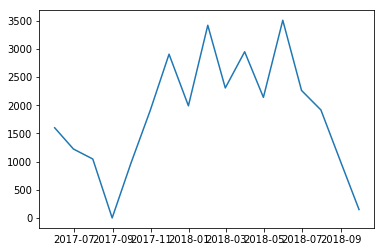

In [168]:
#Mobile deposits for Brenn
mobile_deposits = df[df['Description'].str.contains('MOBILE DEPOSIT', case=False)]
mobile_deposits['Charge'] = mobile_deposits['Charge'].apply(negative)
b_deposits = mobile_deposits[ mobile_deposits['Owner'] == 'Brenn' ]
c_deposits = mobile_deposits[ mobile_deposits['Owner'] == 'Chris' ]
plt.plot(b_deposits['Charge'].resample('M').sum())

In [169]:
b_deposits['Charge']

Date
2018-09-10    148.20
2018-08-10    493.29
2018-08-02    520.53
2018-07-26    515.79
2018-07-19    486.87
2018-07-12    504.59
2018-07-05    408.31
2018-06-28    524.66
2018-06-21    586.88
2018-06-14    490.77
2018-06-07    659.84
2018-05-31    752.98
2018-05-24    632.71
2018-05-17    649.32
2018-05-10    699.58
2018-05-03    772.99
2018-04-26    601.38
2018-04-20    516.50
2018-04-12    581.45
2018-04-05    439.74
2018-03-29    638.40
2018-03-23    441.67
2018-03-19    659.88
2018-03-09    596.46
2018-03-01    612.23
2018-02-23    634.55
2018-02-15    536.15
2018-02-09    668.52
2018-02-02    467.16
2018-01-25    512.65
               ...  
2017-12-22    354.55
2017-12-15    527.04
2017-12-07    525.17
2017-12-01    582.50
2017-11-24    698.52
2017-11-16    753.82
2017-11-10    832.87
2017-11-03    256.50
2017-11-02    363.42
2017-10-30     72.44
2017-10-26    625.91
2017-10-20    364.27
2017-10-12    426.68
2017-10-05    420.78
2017-09-28     30.00
2017-09-28    472.31
2017-09-

In [170]:
c_deposits

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-27,100.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :115270715794,Chris
2018-08-20,278.83,*,NaN,MOBILE DEPOSIT : REF NUMBER :718190042404,Chris
2017-09-01,388.16,*,NaN,MOBILE DEPOSIT : REF NUMBER :817010350209,Chris
2017-08-29,450.27,*,NaN,MOBILE DEPOSIT : REF NUMBER :318260145719,Chris
2017-08-29,200.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :218260145664,Chris
2017-08-29,100.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :118260145563,Chris
2017-08-17,384.15,*,NaN,MOBILE DEPOSIT : REF NUMBER :416170391860,Chris
2017-08-14,239.12,*,NaN,MOBILE DEPOSIT : REF NUMBER :208120345856,Chris
2017-08-07,285.60,*,NaN,MOBILE DEPOSIT : REF NUMBER :712070323250,Chris


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


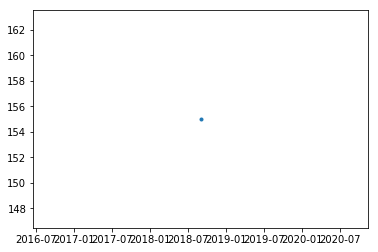

In [171]:
#Direct deposits
direct_deposits = df[df['Description'].str.contains('payroll', case=False)]
direct_deposits['Charge'] = direct_deposits['Charge'].apply(negative)
b_direct_deposits = direct_deposits[ direct_deposits['Owner'] == 'Brenn' ]
c_direct_deposits = direct_deposits[ direct_deposits['Owner'] == 'Chris' ]
plt.plot(b_direct_deposits['Charge'], '.')

In [172]:
crypto = df[df['Description'].str.contains('COINBASE', case=False)]
crypto
paypal = df[df['Description'].str.contains('paypal transfer', case=False)]
paypal['Charge'] = paypal['Charge'].apply(negative)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [173]:
crypto['Charge'].sum()

644.88

In [174]:
incframe = [mobile_deposits, direct_deposits, paypal]
income = pd.concat(incframe)

In [175]:
income.sort_values(by = 'Date', inplace = True)

In [176]:
fg = figure(x_axis_type="datetime")
fg.line(income.index, income['Charge'].resample('M').sum())
show(fg)

/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 116), ('y', 19)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [177]:
income['Charge'].resample('M').sum()

Date
2017-03-31    2073.89
2017-04-30    4135.09
2017-05-31    5734.88
2017-06-30    5988.23
2017-07-31    6844.79
2017-08-31    6088.56
2017-09-30    7357.89
2017-10-31    5910.08
2017-11-30    6905.13
2017-12-31    5989.26
2018-01-31    7418.20
2018-02-28    6306.38
2018-03-31    6948.64
2018-04-30    6139.07
2018-05-31    7507.58
2018-06-30    6262.15
2018-07-31    5915.56
2018-08-31    5847.64
2018-09-30     148.20
Freq: M, Name: Charge, dtype: float64

In [193]:
income.resample('M').sum()['2018'].describe()

,Charge,CheckNo
count,9.000000,9.0
mean,5832.602222,0.0
std,2218.886182,0.0
min,148.200000,0.0
25%,5915.560000,0.0
50%,6262.150000,0.0
75%,6948.640000,0.0
max,7507.580000,0.0


In [179]:
transport_keys = 'MTA|UBER TRIP|LYFT|METRO-NORTH'
transport = df[df['Description'].str.contains(transport_keys, case = False)]

In [197]:
transport_monthly = transport.resample('M').sum()
transport_monthly

,Charge,CheckNo
Date,,
2017-03-31,167.50,0.0
2017-04-30,50.50,0.0
2017-05-31,199.94,0.0
2017-06-30,253.50,0.0
2017-07-31,260.95,0.0
2017-08-31,132.50,0.0
2017-09-30,215.33,0.0
2017-10-31,200.80,0.0
2017-11-30,479.45,0.0


In [194]:
food_keys = 'SUNBASKET|SEAML|STARBUCK|MARKET|FOOD|FRESH|FAMILY DOLLAR|FRESH|UBER EATS|CAFE|DELI|DELI'
food = df[df['Description'].str.contains(food_keys, case = False)]

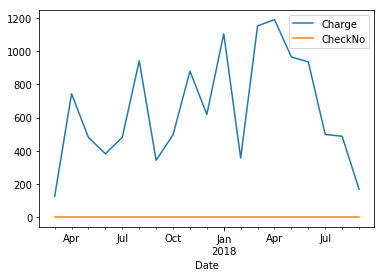

In [202]:
food_monthly = food.resample('M').sum()
food_monthly.plot()

In [205]:
media_keys = 'HULU|SPOTIFY|GOOGLE|ITUNES'
media = df[df['Description'].str.contains(media_keys, case=False)]
media_monthly = media.resample('M').sum()
media_monthly

,Charge,CheckNo
Date,,
2017-03-31,7.99,0.0
2017-04-30,53.51,0.0
2017-05-31,67.41,0.0
2017-06-30,174.72,0.0
2017-07-31,173.28,0.0
2017-08-31,75.27,0.0
2017-09-30,53.52,0.0
2017-10-31,115.18,0.0
2017-11-30,239.85,0.0


,Charge,*,CheckNo,Description,Owner
Date,,,,,
2017-11-30,42.44,*,NaN,PURCHASE AUTHORIZED ON 11/29 APL* ITUNES.COM/B...,Chris
2017-11-24,9.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 11/24 Spotify ...,Chris
2017-11-13,9.99,*,NaN,PURCHASE AUTHORIZED ON 11/10 APL* ITUNES.COM/B...,Chris
2017-11-06,14.14,*,NaN,PURCHASE AUTHORIZED ON 11/04 APL* ITUNES.COM/B...,Chris
2017-11-29,54.43,*,NaN,PURCHASE AUTHORIZED ON 11/28 APL* ITUNES.COM/B...,Brenn
2017-11-14,108.86,*,NaN,PURCHASE AUTHORIZED ON 11/13 APL* ITUNES.COM/B...,Brenn


In [184]:
rent_keys = 'CHECK #'
rent = df[df['Description'].str.contains(rent_keys, case = False)]
rent

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-02,2350.0,*,111.0,CHECK # 111,Chris
2018-07-09,2350.0,*,110.0,CHECK # 110,Chris
2018-06-19,2350.0,*,109.0,CHECK # 109,Chris
2018-06-11,2350.0,*,108.0,CHECK # 108,Chris
2018-05-18,500.0,*,106.0,CHECK # 106,Chris
2018-04-11,2350.0,*,105.0,CHECK # 105,Chris
2018-03-23,2350.0,*,104.0,CHECK # 104,Chris
2018-01-19,2350.0,*,103.0,CHECK # 103,Chris
2017-12-06,2350.0,*,102.0,CHECK # 102,Chris


In [191]:
savings_keys = 'Acorns|Qapital|CLARITY|SAVE AS YOU GO|SAVINGS'
savings = df[df['Description'].str.contains(savings_keys, case = False)]
savings

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-12,26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
2018-09-12,9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
2018-09-12,-165.00,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX0655 Christ...,Chris
2018-09-10,6.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris
2018-09-10,-65.00,*,NaN,ONLINE TRANSFER FROM GLYNN C WAY2SAVE SAVINGS ...,Chris
2018-09-10,-300.00,*,NaN,QAPITAL INC QAPITAL IN 180910 XXXXX1718 Christ...,Chris
2018-09-07,9.74,*,NaN,QAPITAL INC QAPITAL IN 180907 XXXXX4289 Christ...,Chris
2018-09-07,20.00,*,NaN,RECURRING TRANSFER TO GLYNN C REF #OP053XF2GH ...,Chris
2018-09-06,1.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris


In [215]:
bills_keys = 'BILL PAY|RECURRING PAYMENT'
bills = df[df['Description'].str.contains(bills_keys, case = False)]
bills_monthly = bills.resample('M').sum()
bills_monthly['2018']

,Charge,CheckNo
Date,,
2018-01-31,1.99,0.0
2018-02-28,497.40,0.0
2018-03-31,1039.88,0.0
2018-04-30,467.18,0.0
2018-05-31,285.17,0.0
2018-06-30,487.75,0.0
2018-07-31,663.26,0.0
2018-08-31,781.61,0.0
2018-09-30,32.12,0.0


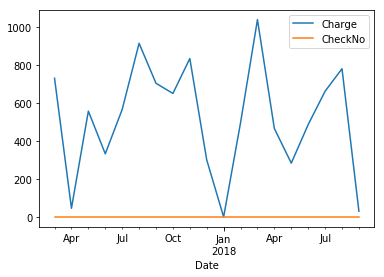

In [214]:
bills_monthly.plot()

In [219]:
bills['2018-08']

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-24,190.00,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/23 EQUINOX ...,Chris
2018-08-22,129.68,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/21 OPTIMUM ...,Chris
2018-08-20,250.82,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/20 VZWRLSS*...,Chris
2018-08-13,7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/10 HLU*Hulu...,Chris
2018-08-06,9.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/05 Spotify ...,Chris
2018-08-03,14.14,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/02 Amazon P...,Chris
2018-08-01,177.00,*,NaN,BILL PAY National Grid ON-LINE xxxxxx67523 ON ...,Chris
2018-08-27,1.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/23 GOOGLE *...,Brenn
